In [1]:
# here instead of testing different reservoir virtual areas, we are going to apply the same
# approch to two different cortical areas

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [3]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 

In [4]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
#from wikipedia2vec import Wikipedia2Vec

#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords


vectorDim = 100

numNode = 1000

reps = 16
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



#here is a small bit of data to train the reservoir.  We dont care
# if it learns because we are analysing the reseroir units, and
#not the readouts

in_small = np.load('in_small.npy')
out_small = np.load('out_small.npy')

Using Numpy backend.


In [5]:
import scipy.io

In [6]:
# here we confirm the data manipulation for fmri files
data1 = scipy.io.loadmat('../data_mat/s1/sherlock_movie/aud_early_sherlock_movie_s1.mat')
data2 = scipy.io.loadmat('../data_mat/s1/sherlock_movie/pmc_nn_sherlock_movie_s1.mat')
print(data1.keys())
aud_data = data1['rdata'][:,:946]
pmc_data = data2['rdata'][:,:946]
#pmc_data = data['rdata'][:,:]


dict_keys(['__header__', '__version__', '__globals__', 'keptvox', 'rdata'])


<AxesSubplot:>

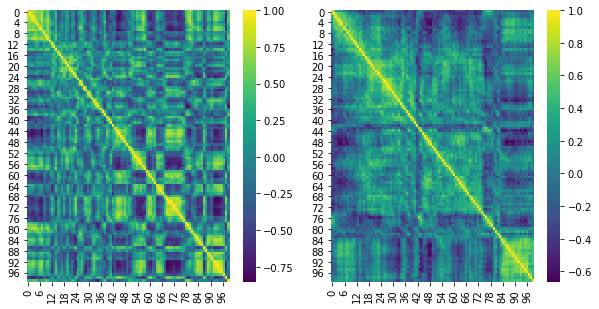

In [7]:
fig=plt.figure(figsize=(10, 5))

fig.add_subplot(121)
sns.heatmap(np.corrcoef(pmc_data.T)[:100,:100],cmap='viridis')
fig.add_subplot(122)
sns.heatmap(np.corrcoef(aud_data.T)[:100,:100],cmap='viridis')

In [8]:
#here we import the word vectors for the intact and shifted 
# not the fall texts.  Avoids using the big wikipedia2vec pkl file

inputDataTestingIntact = np.load('inputDataTestingIntact.npy')
inputDataTestingShift = np.load('inputDataTestingShift.npy')


In [9]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 3.sort;  4. segment (ubuntu)

for res_seed in range(reps):
 
    ###################################################################
    #
    #               OPEN THE FAST AND SLOW CORTICAL AREAS
    #fmri
    data1 = scipy.io.loadmat('../data_mat/s'+str(res_seed+1)+'/sherlock_movie/aud_early_sherlock_movie_s'+str(res_seed+1)+'.mat')
    data2 = scipy.io.loadmat('../data_mat/s'+str(res_seed+1)+'/sherlock_movie/pmc_nn_sherlock_movie_s'+str(res_seed+1)+'.mat')
    
    aud_data = data1['rdata'][:,:600]
    pmc_data = data2['rdata'][:,:600]



    
    ###################################################################
    #
    #               4. Segment
    

    # get the pieces
    #NTF_time1=NTF_SortedStates[:,0:99]
    #NTF_time2=NTF_SortedStates[:,900:999]
    
    NTF_time1=aud_data.T 
    NTF_time2=pmc_data.T

    if res_seed == 0:
        NTF_time1_cumul = NTF_time1
        NTF_time2_cumul = NTF_time2
    else:
        NTF_time1_cumul = NTF_time1 + NTF_time1_cumul
        NTF_time2_cumul = NTF_time2 + NTF_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing
        

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(NTF_time1)

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(NTF_time2)
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_
        
 

        # save likelihood scores
        likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        #a,likelihood[iteration, res_seed,0] = ev_time1.find_events(NTF_time1test)
        #a,likelihood[iteration, res_seed,1] = ev_time2.find_events(NTF_time2test)


        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-1023.0969042741565
-1041.2729941426746
4
res_seed =  0
Likelihood
-1002.9245942553813
-1029.90319190394
6
res_seed =  0
Likelihood
-988.4422127601597
-1014.9034483250006
8
res_seed =  0
Likelihood
-975.447100859888
-1008.4363857028079
10
res_seed =  0
Likelihood
-969.2423562036354
-999.2896407525415
12
res_seed =  0
Likelihood
-960.615981307719
-984.3027814982138
14
res_seed =  0
Likelihood
-950.1355497558476
-980.3875545233378
16
res_seed =  0
Likelihood
-938.1174473519777
-967.9406969916098
18
res_seed =  0
Likelihood
-930.6175312157069
-962.348732027508
20
res_seed =  0
Likelihood
-926.587227087061
-955.0604333815726
22
res_seed =  0
Likelihood
-917.8509855955754
-942.0142408731601
24
res_seed =  0
Likelihood
-906.7457935341777
-939.2472070563092
26
res_seed =  0
Likelihood
-903.3850789815557
-934.5451010992431
28
res_seed =  0
Likelihood
-897.6080863895614
-929.9111143453084
30
res_seed =  0
Likelihood
-895.3584878453398
-925.9322241889998
32
res_seed = 

12
res_seed =  6
Likelihood
-948.2397753447295
-984.1842790346566
14
res_seed =  6
Likelihood
-935.2440652594938
-972.8722685736905
16
res_seed =  6
Likelihood
-926.425862979126
-967.779849625969
18
res_seed =  6
Likelihood
-922.6937928603273
-961.5290564555112
20
res_seed =  6
Likelihood
-912.563214874205
-949.6539067098008
22
res_seed =  6
Likelihood
-907.0669622354491
-946.6164813063918
24
res_seed =  6
Likelihood
-902.056496930482
-939.4147664506693
26
res_seed =  6
Likelihood
-897.4861414709738
-934.3334741994086
28
res_seed =  6
Likelihood
-894.120745006182
-929.91589938892
30
res_seed =  6
Likelihood
-889.5990999369111
-922.9896169489888
32
res_seed =  6
Likelihood
-884.5520529330447
-920.7334066192924
34
res_seed =  6
Likelihood
-882.7981993670403
-918.1679663561184
36
res_seed =  6
Likelihood
-878.5904428535681
-914.4842502817185
38
res_seed =  6
Likelihood
-875.7551001486024
-911.5280186184402
40
res_seed =  6
Likelihood
-873.1739889722676
-910.33130219392
2
res_seed =  7
Lik

20
res_seed =  12
Likelihood
-974.7970607513257
-984.6011422902301
22
res_seed =  12
Likelihood
-970.2041312612423
-980.6928400077556
24
res_seed =  12
Likelihood
-960.997549606367
-977.8175879029958
26
res_seed =  12
Likelihood
-954.8609058915084
-971.1089179777751
28
res_seed =  12
Likelihood
-953.691728001062
-968.14425463784
30
res_seed =  12
Likelihood
-948.6582043268387
-965.6464455018273
32
res_seed =  12
Likelihood
-943.3400026220036
-962.3315379634334
34
res_seed =  12
Likelihood
-941.4846500060396
-960.0994791411657
36
res_seed =  12
Likelihood
-939.6325644000275
-957.2778766598348
38
res_seed =  12
Likelihood
-934.5283216110599
-955.371641192522
40
res_seed =  12
Likelihood
-932.0327109213006
-952.9622581766857
2
res_seed =  13
Likelihood
-1024.9695686785794
-1040.7160165073744
4
res_seed =  13
Likelihood
-1003.2806185899947
-1027.5910322972359
6
res_seed =  13
Likelihood
-990.9708714870051
-1018.8799371233156
8
res_seed =  13
Likelihood
-977.5605604817312
-1008.771262601985

In [10]:
#for the figure get the mean reservoir states
NTF_time1_last = NTF_time1
NTF_time2_last = NTF_time2

#np.save('NTF-time1-last-june10.npy', NTF_time1) 
#np.save('NTF-time2-last-june10.npy', NTF_time2) 



In [45]:
NTF_time1 = NTF_time1_cumul/reps
NTF_time2 = NTF_time2_cumul/reps

In [12]:
#save the data likelihood
#np.save('NTF-time1-june10.npy', NTF_time1) 
#np.save('NTF-time2-june10.npy', NTF_time2) 

#np.save('likelihood-june10.npy', likelihood) 

In [43]:
NTF_time1 = NTF_time1_last
NTF_time2 = NTF_time2_last

In [47]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(NTF_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(NTF_time2)




#save the data likelihood
#np.save('NTF-time1-june6.npy', NTF_time1) 
#np.save('NTF-time2-june6.npy', NTF_time2) 

#np.save('likelihood-june6.npy', likelihood) 

EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0.]), n_events=8)

In [15]:
print(NTF_time1.shape)
print(NTF_time2.shape)

(600, 1018)
(600, 481)


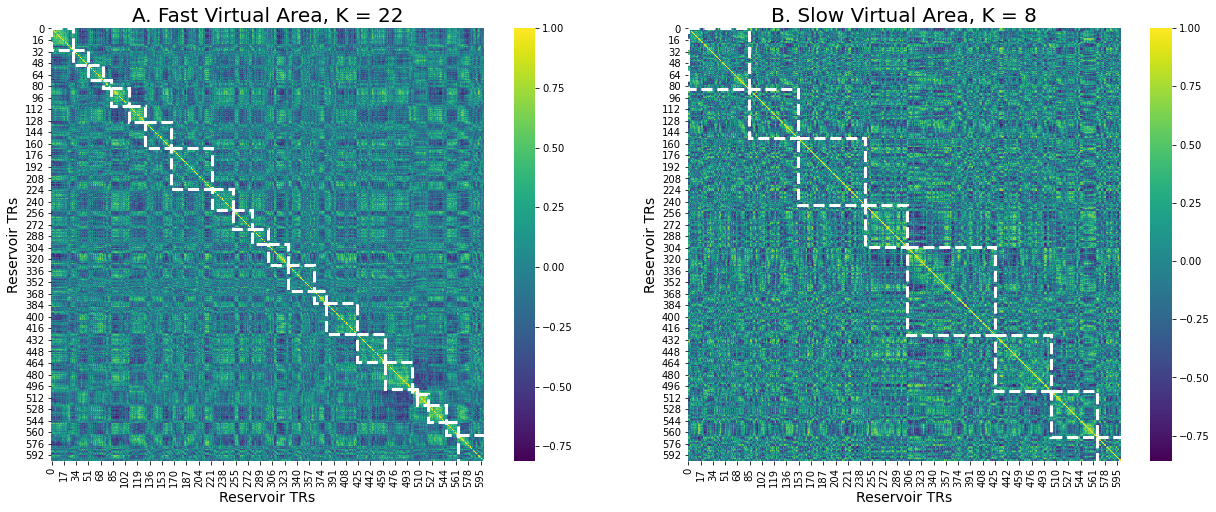

In [16]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=946
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('CHARM13072021.png')

In [17]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if t> 0 and p<0.05:
            print(i,j,t,p)


0 1 4.795683038927772 0.0002358758607543981
0 2 5.225984344002526 0.00010253284039035682
1 2 3.2825361329699025 0.00503602993964814
0 3 5.924528874552293 2.7890445372282262e-05
1 3 3.856269359330694 0.0015539008890418096
0 4 6.135547857261326 1.9067553853582543e-05
1 4 4.353436360204993 0.0005674843773191873
2 4 3.154141935188972 0.006550628981556139
3 4 2.5763477156207233 0.02106701945629187
0 5 6.073610077787074 2.1305748734104034e-05
1 5 4.016072101109694 0.0011220406710566093
2 5 2.8460113722232916 0.012265047929145064
3 5 2.2866889401729984 0.037167579451692176
0 6 6.830144989573882 5.694339487883641e-06
1 6 4.636984984976277 0.00032246905858268745
2 6 3.4850468577246447 0.0033239755340795296
3 6 3.3920031928218184 0.0040232603587782466
4 6 2.459306153312252 0.026551286401407328
5 6 2.630383074775173 0.018918061663454604
0 7 6.624525004975041 8.087552799113516e-06
1 7 4.542110378876878 0.00038925550439038766
2 7 3.2810655026616855 0.005051235286973286
3 7 3.0980371680729406 0.0073

(20, 20)
49
0.0023408383912050046
0.021710800077357196


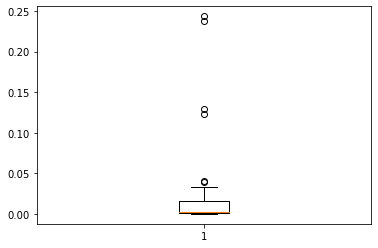

In [19]:
print(pmatrix.shape)

pmeans=np.zeros([50])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(3,8):
    for j in range(9,19):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

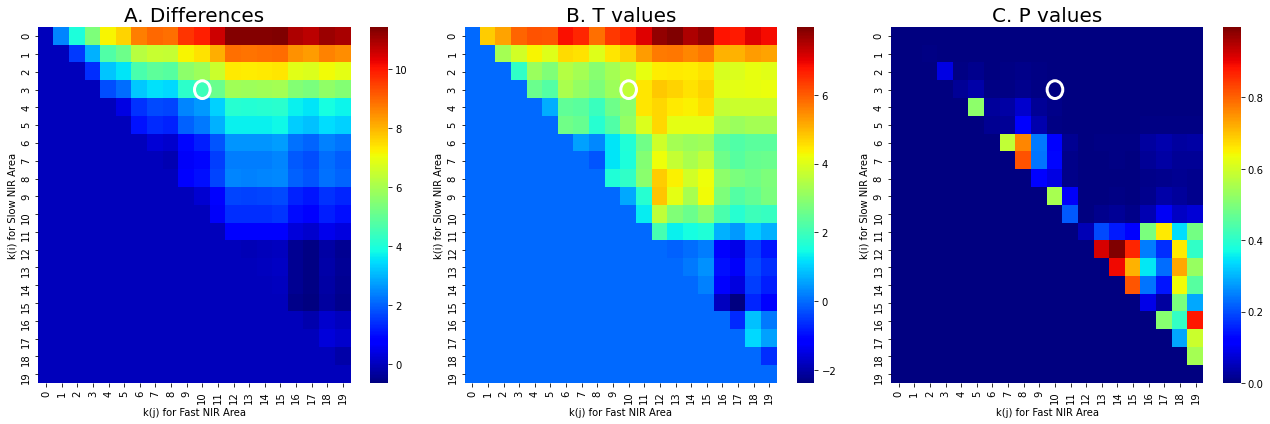

In [20]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('CHARMWIP1.png')

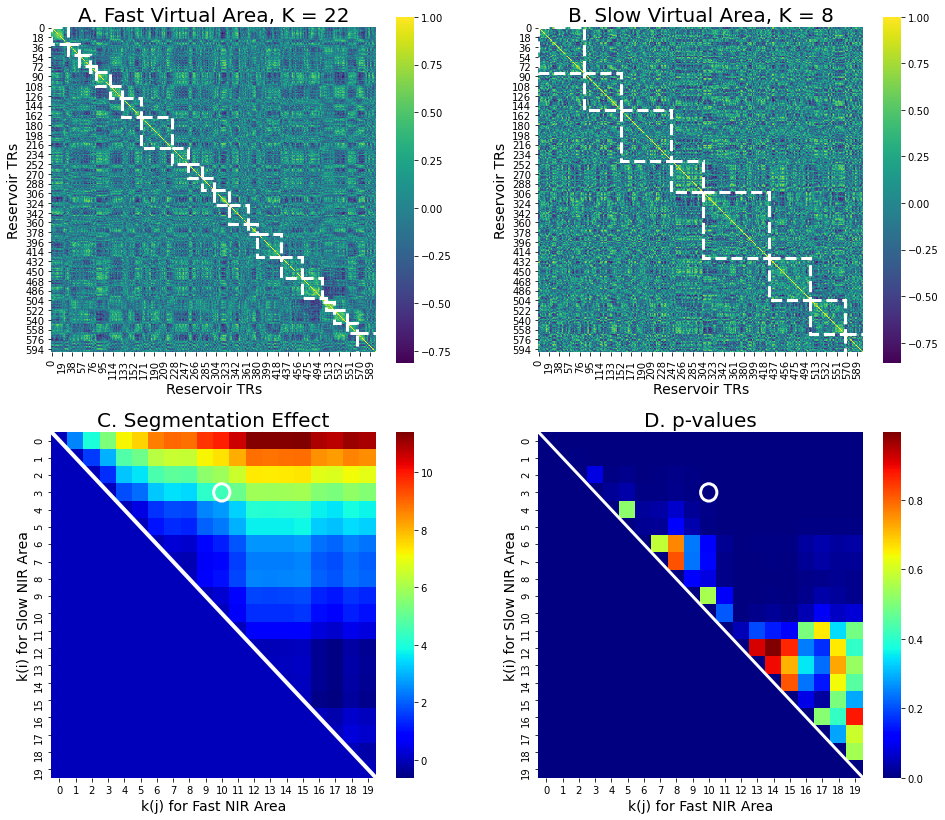

In [21]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=946
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-Combined.png', dpi=600)


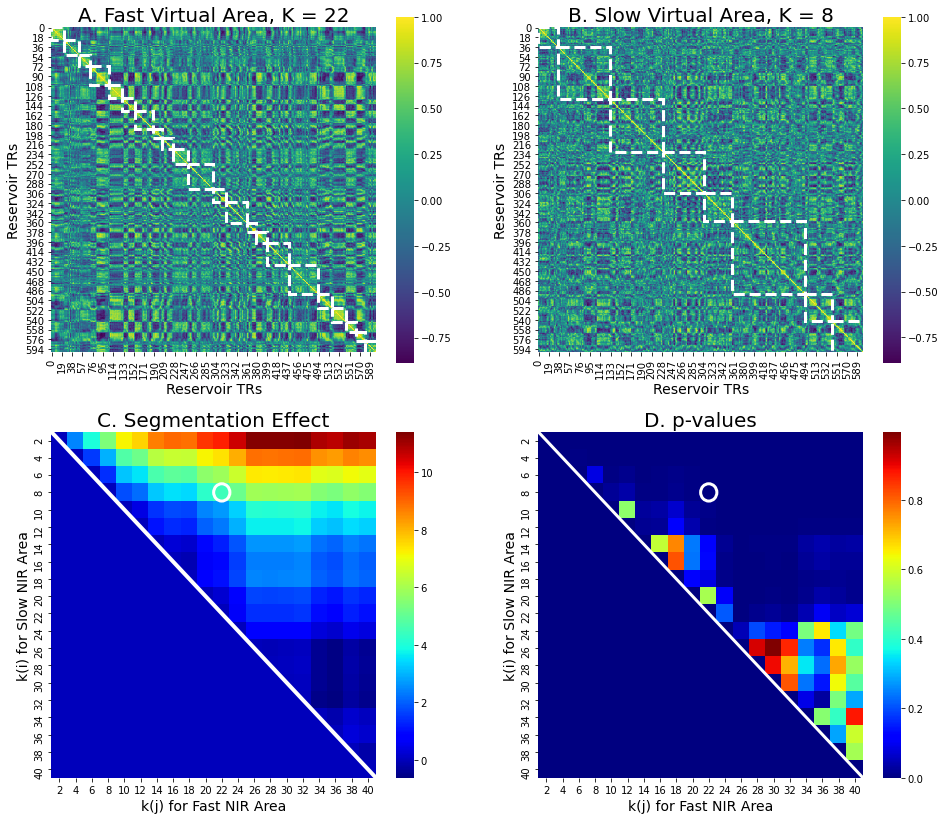

In [49]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=946
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('Sherlock600-EX4C8.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

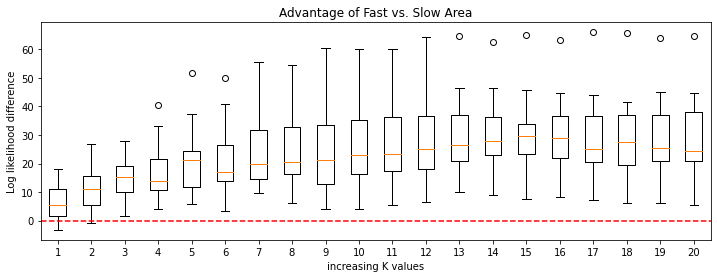

In [24]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,0].T-likelihood[:,:,1].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([2., 1., 6., 3., 1., 2., 0., 0., 0., 1.]),
 array([-995.59950948, -989.03117537, -982.46284126, -975.89450716,
        -969.32617305, -962.75783894, -956.18950484, -949.62117073,
        -943.05283662, -936.48450251, -929.91616841]),
 <BarContainer object of 10 artists>)

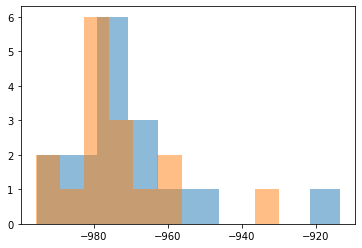

In [25]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb7d5f13f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb7d6167610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb7d5f01610>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb7d60a0150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb7d60a0a50>,
 'means': []}

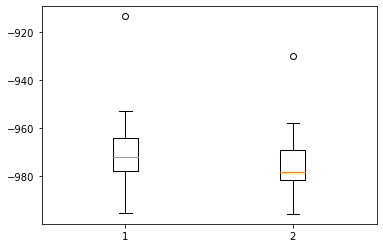

In [26]:
plt.boxplot([data4,data3])

In [27]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

3.6632780304737635
0.00230622608821098
4.481598429957167


In [28]:
print(np.shape(likelihood))
print(kvalues)

(20, 16, 2)
20


<AxesSubplot:>

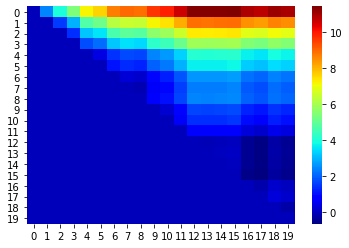

In [29]:
sns.heatmap(dmatrix,cmap='jet')

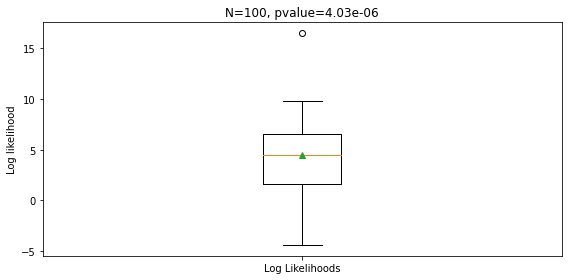

In [30]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

In [31]:
#likelihood = np.load('likelihood-june10.npy')

In [32]:
#np.save('NTF-time1-june6.npy', NTF_time1) 
#np.save('NTF-time2-june6.npy', NTF_time2) 

#np.save('likelihood-june6.npy', likelihood) 

#NTF_time1 = np.load('NTF-time1-last-june10.npy')
#NTF_time2 = np.load('NTF-time2-last-june10.npy')

In [33]:
#NTF_time1 = np.load('NTF-time1-june10.npy')
#NTF_time2 = np.load('NTF-time2-june10.npy')

In [34]:
# save likelihood scores
print('liklihood')
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


liklihood
[-950.3126399]
[-1008.65857215]


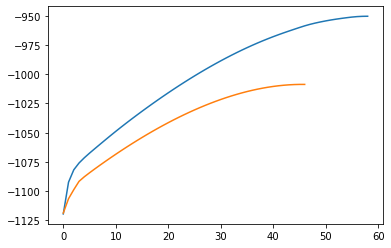

In [35]:
plt.plot(ev_time1.ll_)
plt.plot(ev_time2.ll_)

In [36]:
NTF_time1 = NTF_time1_cumul/reps
NTF_time2 = NTF_time2_cumul/reps

In [37]:
NTF_time1 = NTF_time1_last
NTF_time2 = NTF_time2_last

In [38]:
ev_time1 = brainiak.eventseg.event.EventSegment(200)
ev_time1.fit(NTF_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(200)
ev_time2.fit(NTF_time2)

EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             n_events=200)

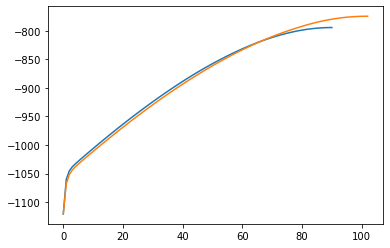

In [39]:
plt.plot(ev_time1.ll_)
plt.plot(ev_time2.ll_)

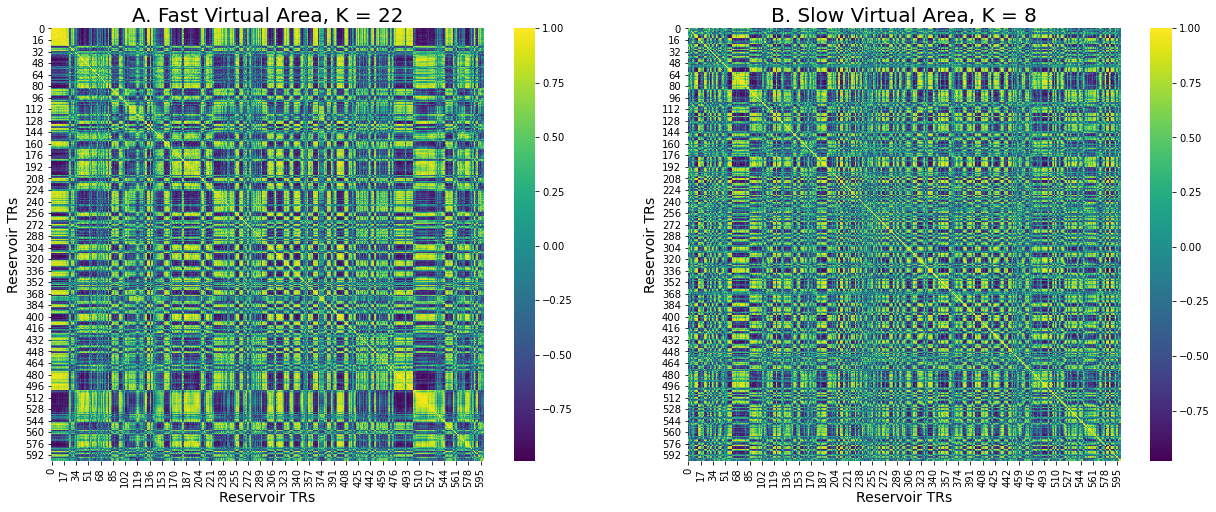

In [40]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('CHARMwip.png')

In [41]:
print(NTF_time1.shape)

(600, 1018)


In [42]:
for j in range(99):
    mean = NTF_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        NTF_time1[:,j] = NTF_time1[:,j]/mean

for j in range(99):
    mean = NTF_time2[:,j].mean()
    if abs(mean) > 0.01:
        NTF_time2[:,j] = NTF_time2[:,j]/mean


In [22]:
for j in range(99):
    mean = NTF_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        NTF_time1[:,j] = NTF_time1[:,j]/mean

for j in range(99):
    mean = NTF_time2[:,j].mean()
    if abs(mean) > 0.01:
        NTF_time2[:,j] = NTF_time2[:,j]/mean